In [ ]:
# import the required module / sub-module 

In [1]:
import numpy as np # for handling missing data
import pandas as pd # for data manipulation and cleaning
import matplotlib.pyplot as plt # for plotting data records
import seaborn as sns # for advanced visualization

In [ ]:
# Step 1: Load and Explore the Dataset 

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\yashr\Downloads\india_crime_data_5000_inconsistent.csv")

In [3]:
# View first few rows
df.head(3)

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business


In [4]:
# find the missing value
df.isnull().sum()

Crime_ID                     0
Crime_Type                   0
City                         0
Date_of_Occurrence           0
Time_of_Occurrence           0
Severity_Level               0
Latitude                     0
Longitude                    0
Reporting_Channel            0
Weather_Condition            0
Day_of_Week                  0
Number_of_Witnesses          0
Injuries_Report              0
Arrests_Made                 0
Suspect_Identified           0
Response_Time (minutes)      0
Offender_Age_Group           0
Temperature (°C)            40
Festival/Season            679
Victim_Occupation           51
dtype: int64

In [ ]:
# Step 2: Handle Missing and Duplicate Data

In [6]:
# Remove duplicate rows
df = df.drop_duplicates()
df.head(3)

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business


In [7]:
df['Victim_Occupation'] = df['Victim_Occupation'].fillna("Unknown")

In [8]:
df['Temperature (°C)'] = df['Temperature (°C)'].fillna(df['Temperature (°C)'].mean())

In [11]:
df.head(3)

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business


In [12]:
df.shape

(5000, 20)

In [ ]:
# Step 3: Standardize Categorical Data

In [13]:
# Fix typos and inconsistent formatting
df['Crime_Type'] = df['Crime_Type'].str.title().replace({
    'Murdre': 'Murder',
    'Tehft': 'Theft',
    'Assualt': 'Assault',
    'Burglaryy': 'Burglary'
})
df['City'] = df['City'].str.title().replace({
    'Del Hi': 'Delhi',
    'Mumbay': 'Mumbai',
    'Banglore': 'Bangalore',
    'Chen Nai': 'Chennai',
    'Kolkataa': 'Kolkata'
})

In [14]:
df

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business
3,c21d01c7-3078-41b3-8f55-4917aeb9b497,Assault,Chennai,2020-07-05,02:51:14,Medium,17.734397,84.117286,Helpline,Cloudy,Sunday,0,No,No,No,27,Juvenile,31.0,Eid,Others
4,3f3a2631-d448-4c2a-a7c1-213d373f7ceb,Cybercrime,Jaipur,2020-07-23,20:54:48,High,36.045546,82.041492,Online,Stormy,Tuesday,10,Yes,No,Yes,18,26-40,16.0,Navratri,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,c44b625a-2669-44b7-ac80-59fbbb0b93ba,Domestic Violence,Mumbai,2020-12-12,19:16:04,Medium,14.227930,72.840169,Online,Clear,Tuesday,8,No,No,Yes,20,18-25,44.0,Eid,Others
4996,86d3fe53-6e2c-4ada-8267-ff008c01141b,Burglary,Delhi,2020-09-26,12:26:14,High,18.935197,91.027484,Police Station,Cloudy,Monday,6,Yes,Yes,Yes,15,Juvenile,25.0,Diwali,Teacher
4997,971117c6-570d-42d9-a426-3d5de18109e1,Burglary,Lucknow,2024-09-19,01:37:48,Medium,26.859466,72.484382,Police Station,Stormy,Monday,2,Yes,No,Yes,32,26-40,25.0,Eid,Student
4998,f2cf7a5c-316c-49de-86af-ebcb8b3e8806,Cybercrime,Mumbai,2023-07-26,18:24:56,High,35.059279,68.132817,Anonymous Tip,Clear,Friday,9,Yes,Yes,Yes,11,18-25,43.0,Diwali,Unemployed


In [ ]:
# Visualization part for mentioned objectives 

In [ ]:
# visualization for main objectives

In [ ]:
# 1. Analyze Crime Trends
# 📌 Goal: Identify crime patterns across different cities and crime types.
# 📊 Chart: Countplot of City vs. Crime
# 🎨 Color: 'skyblue'

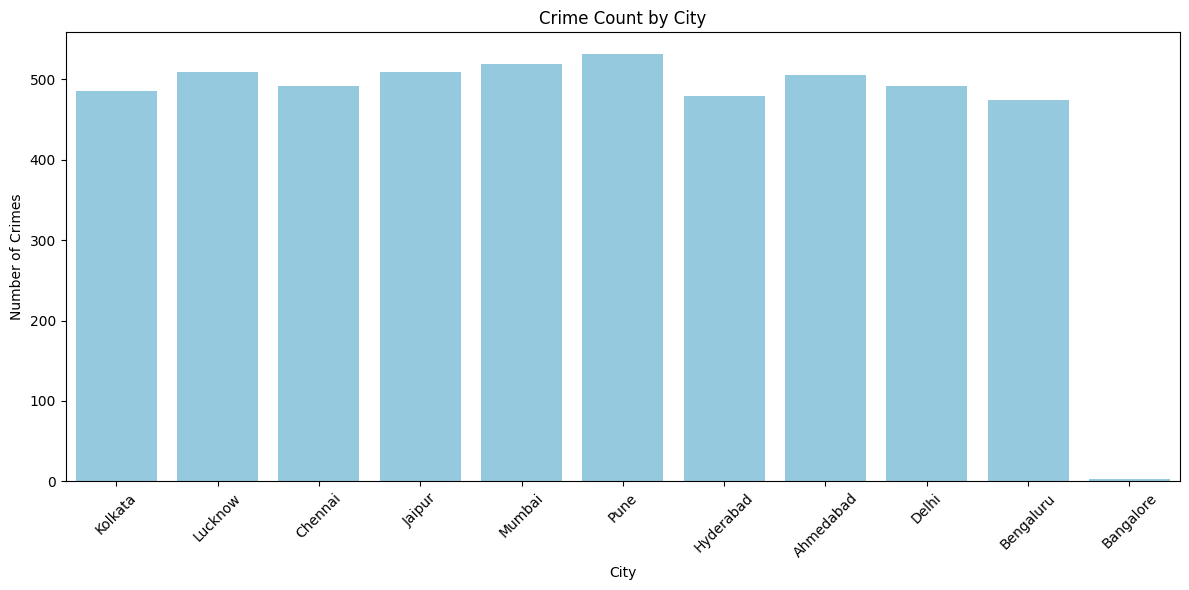

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City', color='skyblue')
plt.title("Crime Count by City")
plt.xlabel("City")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Assess Crime Severity and Response Time
# 📌 Goal: How severity affects police response.
# 📊 Chart: Boxplot
# 🎨 Palette: {'Low': '#a1dab4', 'Medium': '#41b6c4', 'High': '#225ea8'}

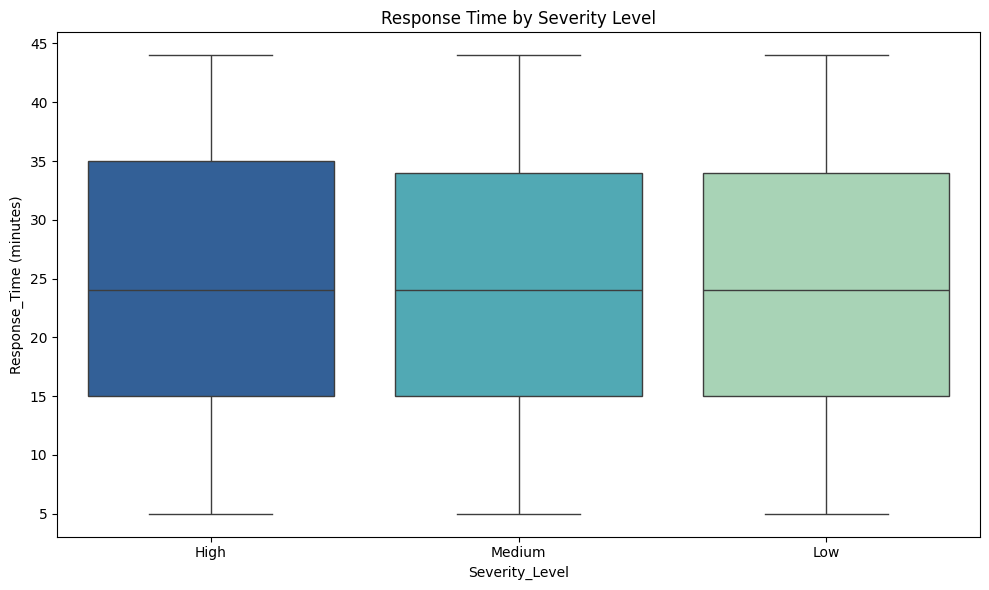

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Severity_Level', y='Response_Time (minutes)', hue='Severity_Level',
            palette={'Low': '#a1dab4', 'Medium': '#41b6c4', 'High': '#225ea8'}, legend=False)
plt.title("Response Time by Severity Level")
plt.tight_layout()
plt.show()


In [ ]:
# 3. Impact of Environmental Factors on Crime
# 📌 Goal: Explore festival and weather effects.
# 📊 Chart: Grouped Bar Chart
# 🎨 Palette: 'pastel'

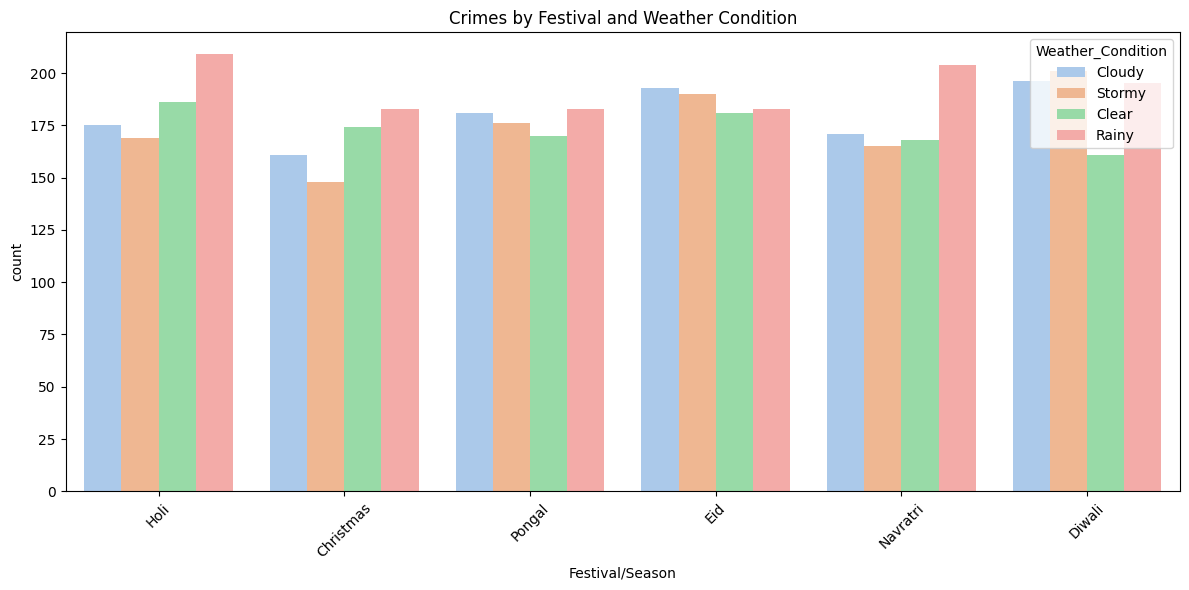

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Festival/Season', hue='Weather_Condition', palette='pastel')
plt.title("Crimes by Festival and Weather Condition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Crime Reporting and Investigation Analysis
# 📌 Goal: Are some reporting channels more effective?
# 📊 Chart: Stacked Bar Chart
# 🎨 Colors: Green and Red

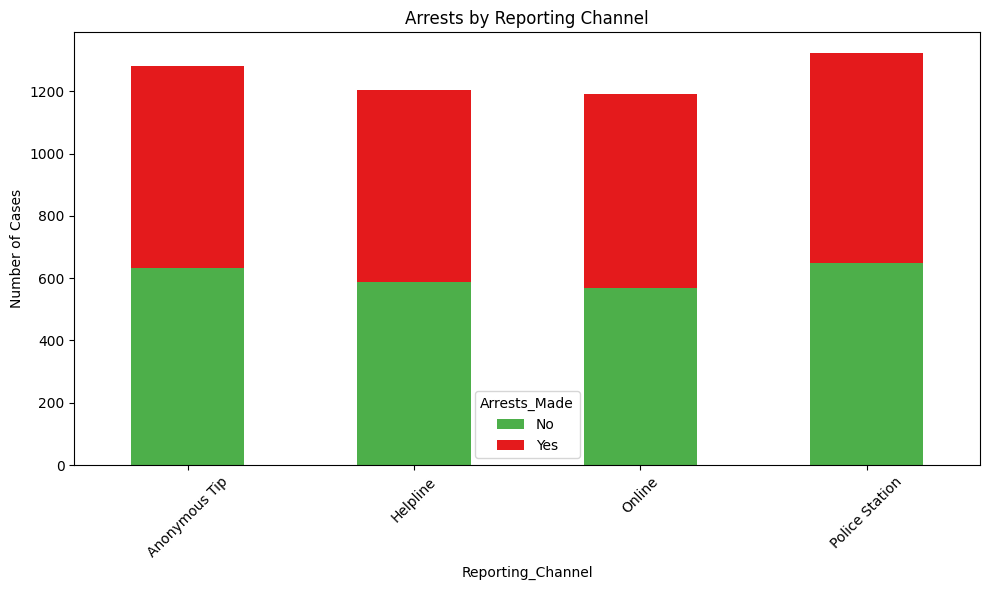

In [21]:
colors = ['#4daf4a', '#e41a1c']
pd.crosstab(df['Reporting_Channel'], df['Arrests_Made']).plot(
    kind='bar', stacked=True, figsize=(10, 6), color=colors
)
plt.title("Arrests by Reporting Channel")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 5. Demographic Insights on Crime
# 📌 Goal: Link age and occupation with crime types.
# 📊 Chart: Grouped Countplot
# 🎨 Palette: 'Set2'

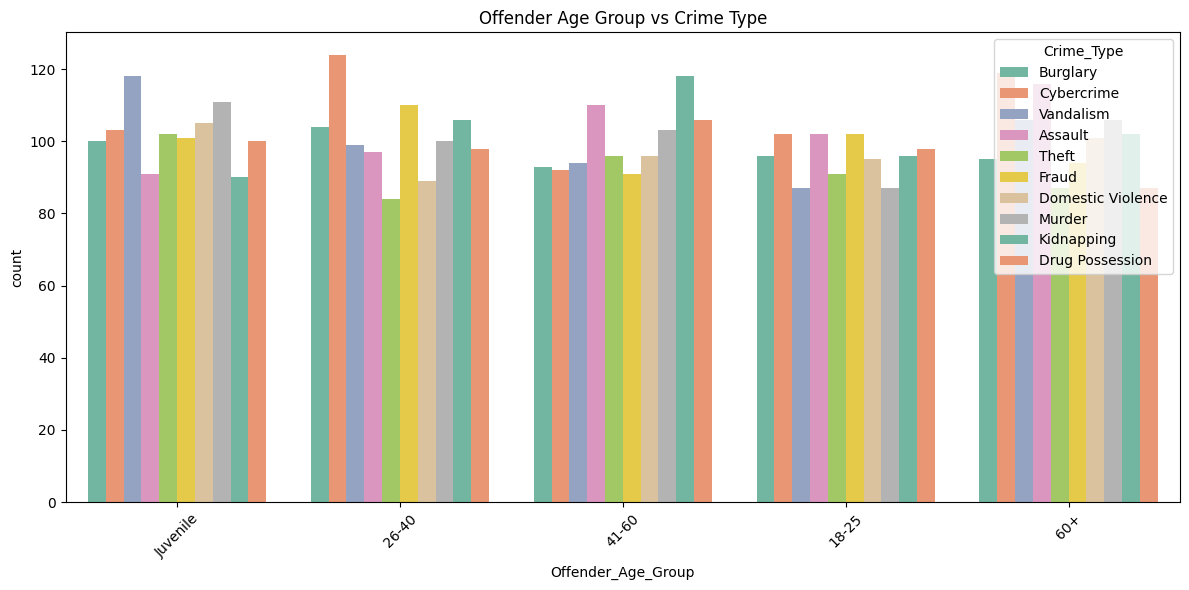

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Offender_Age_Group', hue='Crime_Type', palette='Set2')
plt.title("Offender Age Group vs Crime Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# visualization for sub-objectives

In [ ]:
# 1. Temporal Crime Analysis
# 📌 Goal: Peak crime days and hours.
# 📊 Chart: Line Plot
# 🎨 Color: 'tomato'

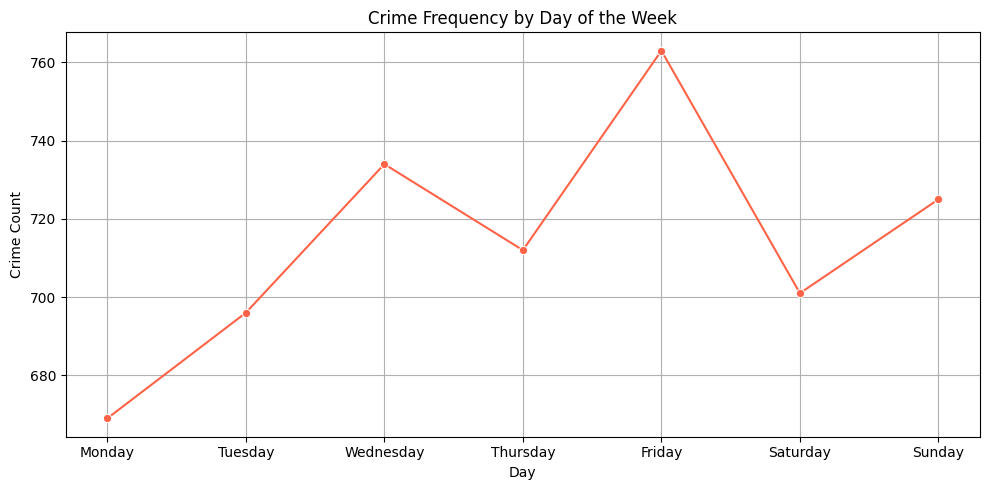

In [23]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Day_of_Week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 5))
sns.lineplot(x=day_counts.index, y=day_counts.values, marker='o', color='tomato')
plt.title("Crime Frequency by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Crime Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Geospatial Analysis
# 📌 Goal: High-crime zones using coordinates.
# 📊 Chart: Folium HeatMap

In [32]:
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m.save("crime_heatmap.html")
IFrame("crime_heatmap.html", width=800, height=500)


In [ ]:
# 3. Crime Type vs Witness Availability
# 📌 Goal: Do some crimes attract more witnesses?
# 📊 Chart: Boxplot
# 🎨 Palette: 'coolwarm'

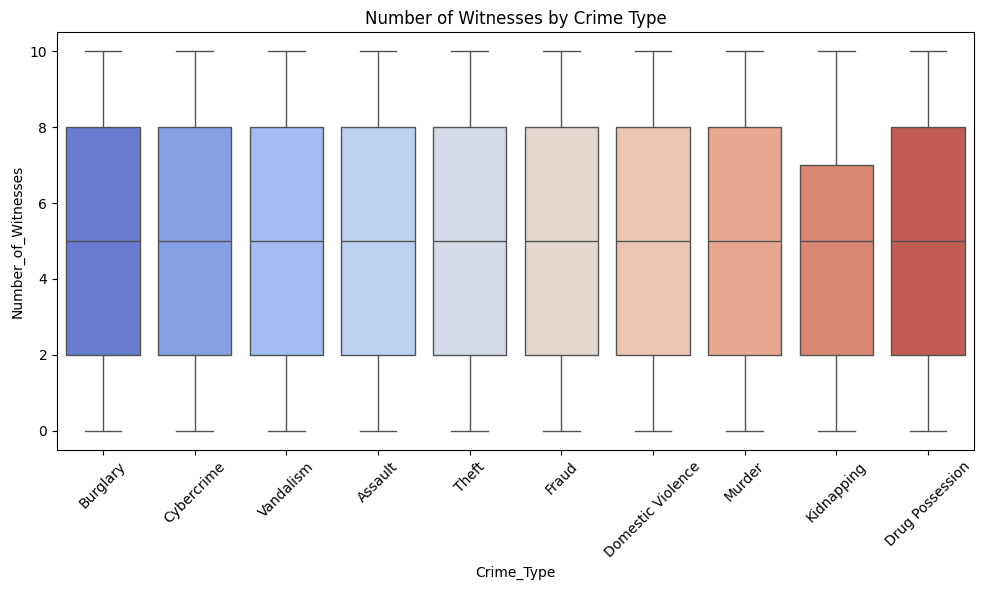

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Crime_Type', y='Number_of_Witnesses', hue='Crime_Type', 
            palette='coolwarm', legend=False)
plt.title("Number of Witnesses by Crime Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Effectiveness of Arrests
# 📌 Goal: Is suspect identification linked to arrests?
# 📊 Chart: Grouped Countplot
# 🎨 Palette: 'Set1'

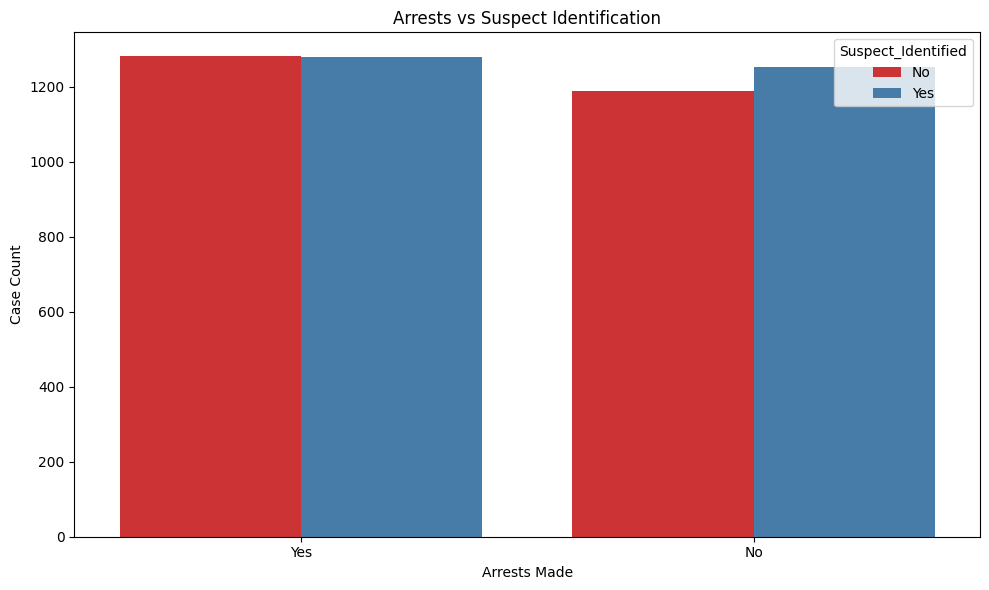

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Arrests_Made', hue='Suspect_Identified', palette='Set1')
plt.title("Arrests vs Suspect Identification")
plt.xlabel("Arrests Made")
plt.ylabel("Case Count")
plt.tight_layout()
plt.show()

In [ ]:
# 5. Seasonal Impact on Crimes
# 📌 Goal: Crime spikes during specific festivals/seasons.
# 📊 Chart: Bar Chart
# 🎨 Palette: 'Blues'

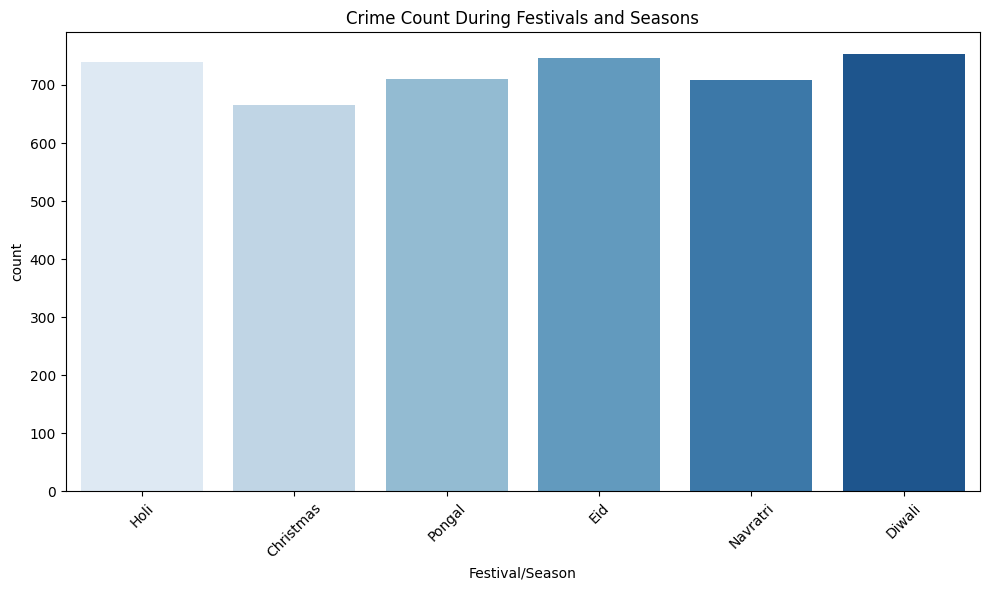

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Festival/Season', hue='Festival/Season', palette='Blues', legend=False)
plt.title("Crime Count During Festivals and Seasons")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 🌟 Unique & Alternative Visualizations (Fresh Options)

In [ ]:
# 🔹 1. Violin Plot
# ➡️ Shows distribution + density + quartiles (like a fancy boxplot).
# 📌 Use case: Compare distribution of Response_Time across Severity_Level.

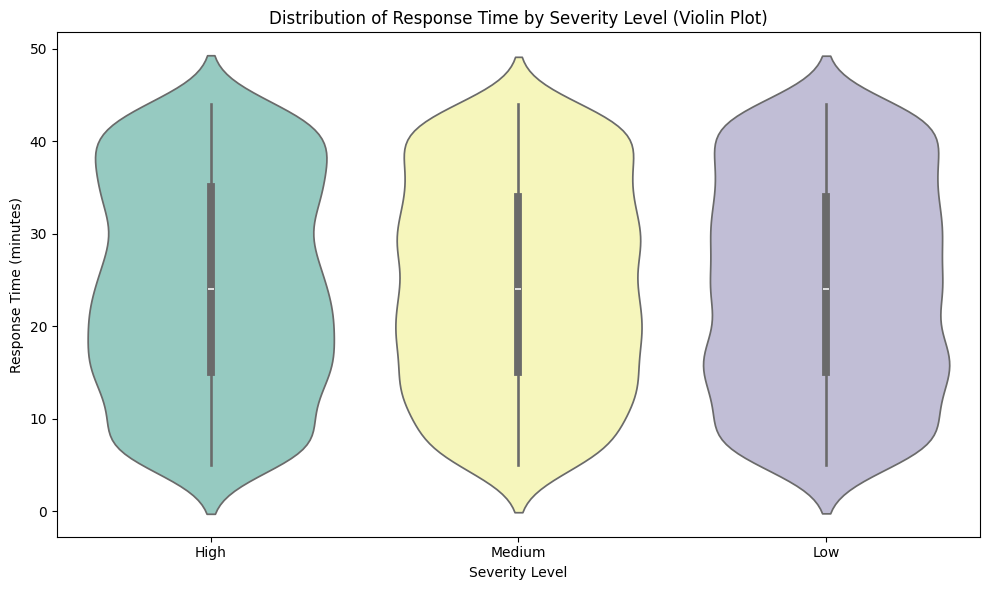

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='Severity_Level',
    y='Response_Time (minutes)',
    hue='Severity_Level',
    palette='Set3',
    legend=False
)

plt.title("Distribution of Response Time by Severity Level (Violin Plot)")
plt.xlabel("Severity Level")
plt.ylabel("Response Time (minutes)")
plt.tight_layout()
plt.show()


In [ ]:
# 🔹 2. Swarm Plot
# ➡️ Great for small datasets to see individual points + clusters
# 📌 Use case: Crime_Type vs Number_of_Witnesses

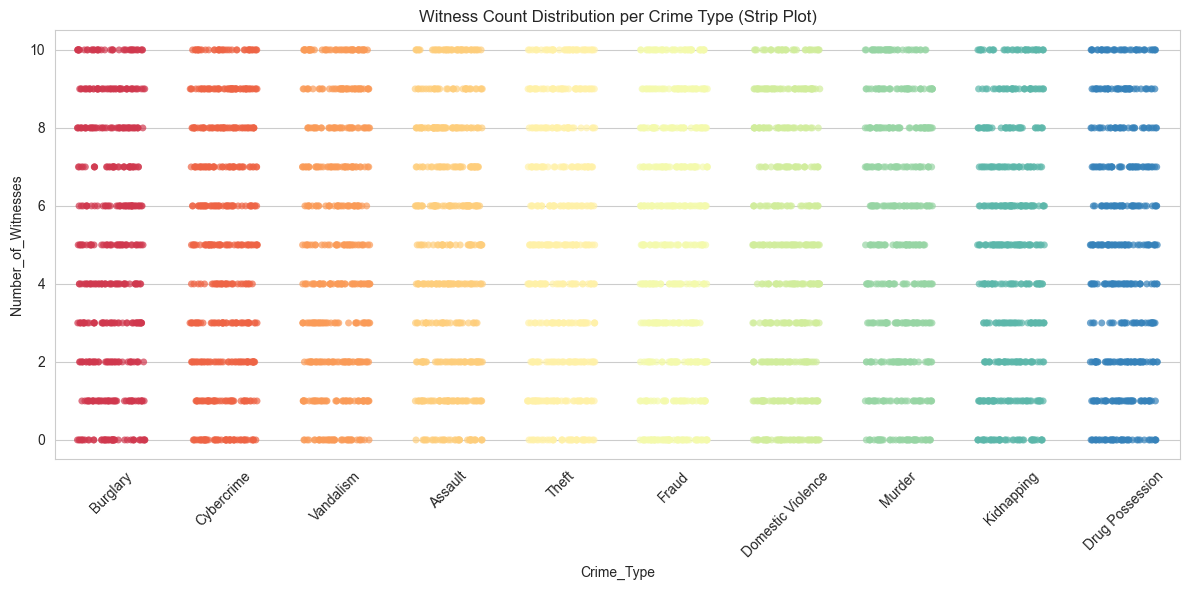

In [39]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df,
    x='Crime_Type',
    y='Number_of_Witnesses',
    hue='Crime_Type',
    palette='Spectral',
    dodge=False,
    alpha=0.7,
    jitter=0.3,
    legend=False
)
plt.title("Witness Count Distribution per Crime Type (Strip Plot)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 🔹 3. Heatmap of Crimes by Hour & Day
# ➡️ Shows volume of crimes across hour of day vs day of week
# 📌 Use case: Find peak crime slots

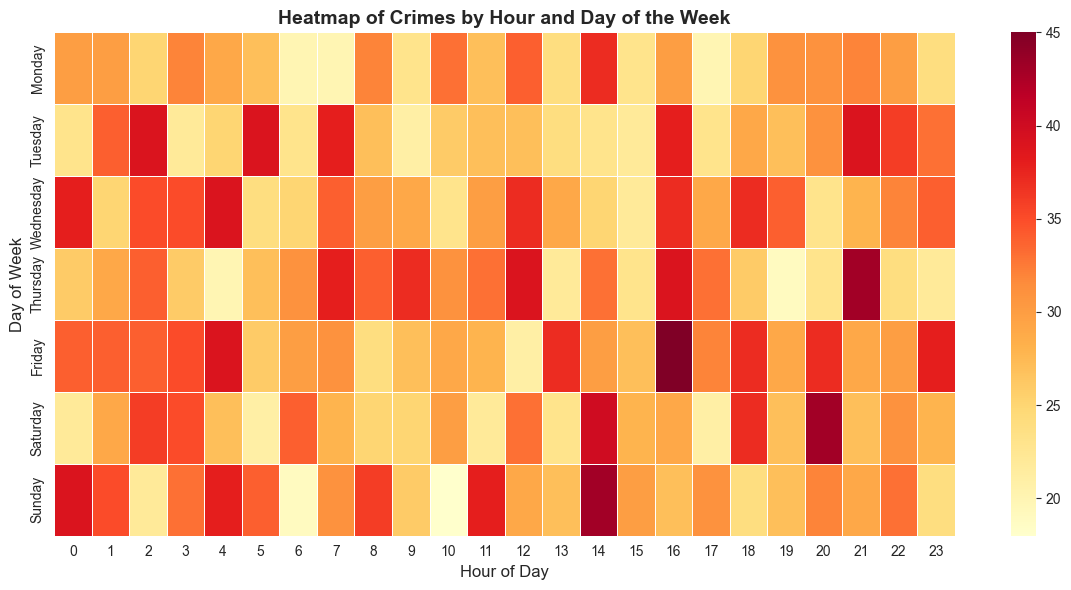

In [44]:

# STEP 1: Create synthetic 'Hour' column if it doesn't exist
if 'Hour' not in df.columns:
    np.random.seed(42)  # Optional: for reproducibility
    df['Hour'] = np.random.randint(0, 24, size=len(df))

# STEP 2: Standardize Day_of_Week column
df['Day_of_Week'] = df['Day_of_Week'].str.title()

# STEP 3: Define correct weekday order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# STEP 4: Create pivot table for heatmap
pivot_table = pd.crosstab(df['Day_of_Week'], df['Hour'])
pivot_table = pivot_table.reindex(ordered_days)  # Maintain logical order

# STEP 5: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.5)
plt.title("Heatmap of Crimes by Hour and Day of the Week", fontsize=14, weight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# 🔹 4. Treemap (Hierarchical Frequency)
# ➡️ Visualizes category breakdown by area
# 📌 Use case: Visualize Crime_Type inside each City (if supported)

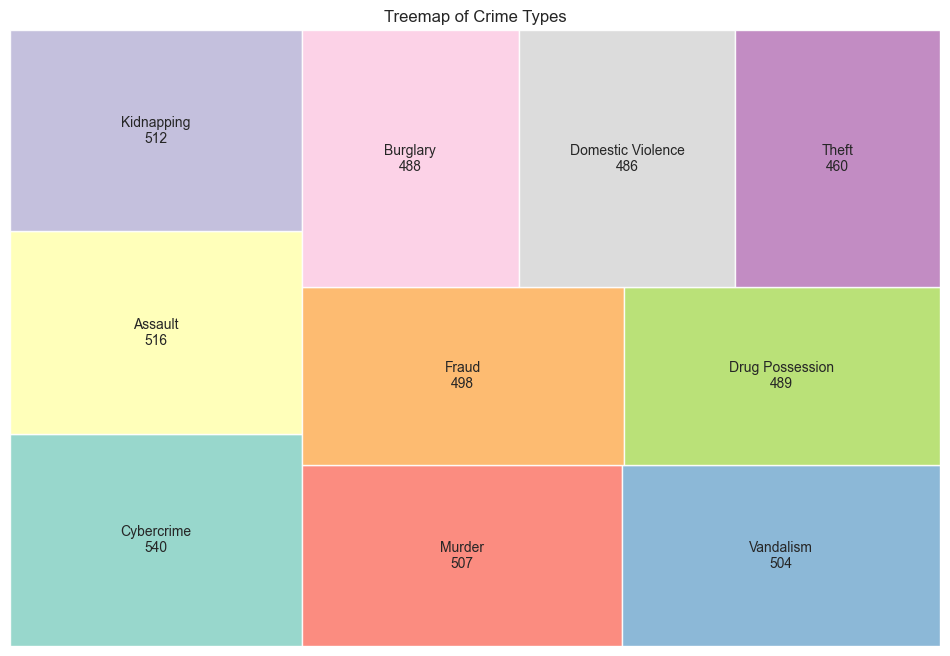

In [48]:
import squarify

crime_counts = df['Crime_Type'].value_counts()
labels = [f"{label}\n{value}" for label, value in zip(crime_counts.index, crime_counts.values)]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=crime_counts.values, label=labels, color=sns.color_palette('Set3'), alpha=.9)
plt.title("Treemap of Crime Types")
plt.axis('off')
plt.show()

In [ ]:
# 🔹 5. Radial Bar (Polar Plot)
# ➡️ Beautiful circular bar chart
# 📌 Use case: Seasonal or weekly trends

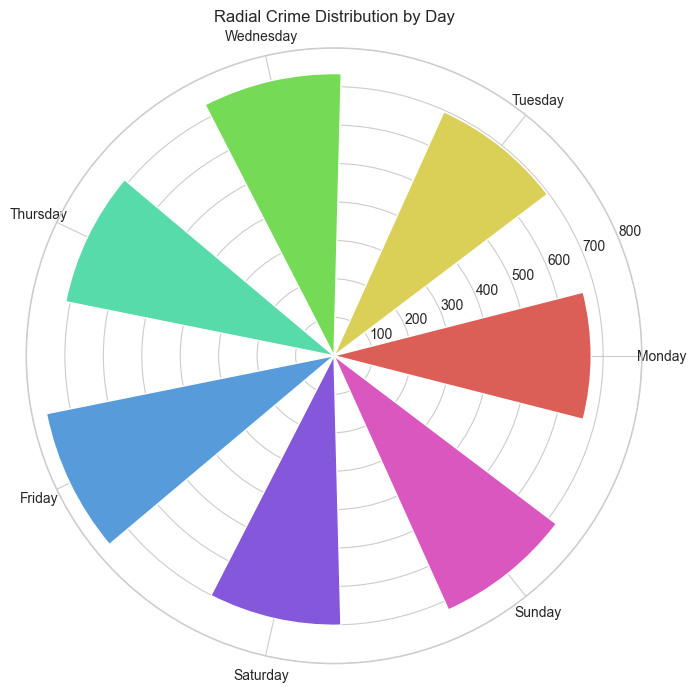

In [46]:
crime_by_day = df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 8))
theta = np.linspace(0, 2 * np.pi, len(crime_by_day), endpoint=False)
radii = crime_by_day.values
colors = sns.color_palette("hls", len(crime_by_day))

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=0.5, color=colors)
ax.set_xticks(theta)
ax.set_xticklabels(crime_by_day.index)
plt.title("Radial Crime Distribution by Day")
plt.show()

In [ ]:
# 🔹 6. Pairplot (Multivariate Patterns)
# ➡️ Explore relationships among multiple numerical features
# 📌 Use case: Response Time, Witnesses, Temp, etc. by Crime_Type

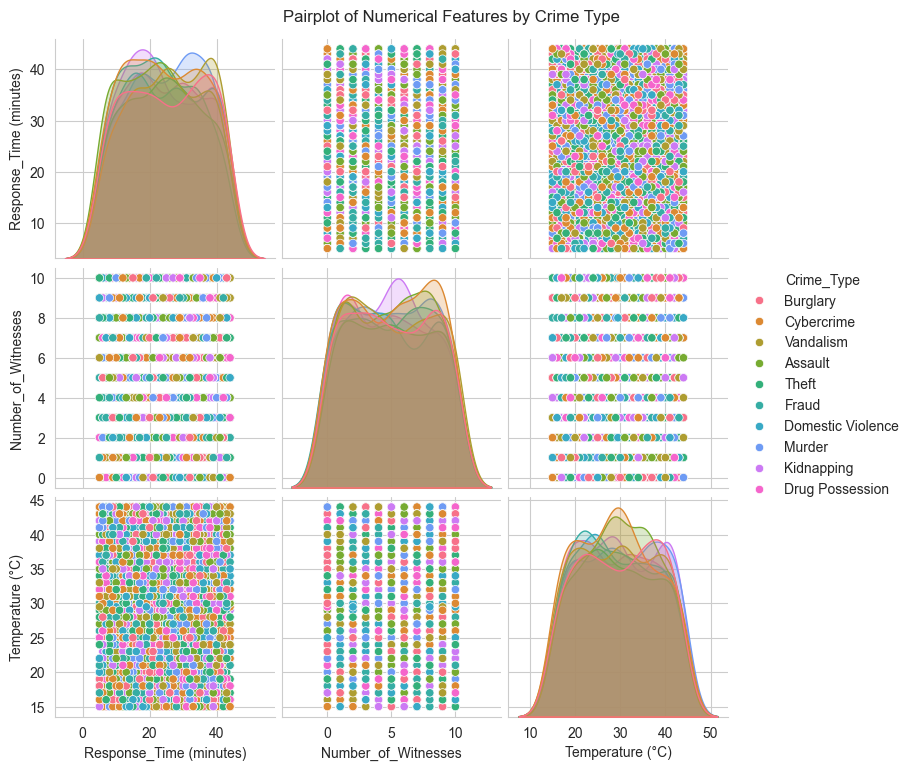

In [47]:
numerical_cols = ['Response_Time (minutes)', 'Number_of_Witnesses', 'Temperature (°C)']
sns.pairplot(df[numerical_cols + ['Crime_Type']], hue='Crime_Type', palette='husl')
plt.suptitle("Pairplot of Numerical Features by Crime Type", y=1.02)
plt.show()